**Predicting Employee Attrition Using Machine Learning: A Study on IBM HR Dataset**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition (2).csv'
data = pd.read_csv(file_path)

# Show the first few rows and summary of the dataset
data_info = data.info()
data_head = data.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(None,
    Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    ...  RelationshipSatisfaction StandardHours  Stoc

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Ensure 'Attrition' is not part of the categorical or numerical columns
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target


# Option 1: Drop rows with missing values
df = df.dropna()
# Remove any unnecessary columns like 'Over18' from categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Over18', errors='ignore')  # Over18 has a single unique value

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing: OneHotEncode categorical and Scale numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check the shape of processed data
print(X_train_processed.shape, X_test_processed.shape)



(1029, 47) (441, 47)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 714 to 1126
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1029 non-null   int64 
 1   BusinessTravel            1029 non-null   object
 2   DailyRate                 1029 non-null   int64 
 3   Department                1029 non-null   object
 4   DistanceFromHome          1029 non-null   int64 
 5   Education                 1029 non-null   int64 
 6   EducationField            1029 non-null   object
 7   EmployeeCount             1029 non-null   int64 
 8   EmployeeNumber            1029 non-null   int64 
 9   EnvironmentSatisfaction   1029 non-null   int64 
 10  Gender                    1029 non-null   object
 11  HourlyRate                1029 non-null   int64 
 12  JobInvolvement            1029 non-null   int64 
 13  JobLevel                  1029 non-null   int64 
 14  JobRole                   1

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
# PCA setup to retain 95% of variance
pca = PCA(n_components=0.95)

# Logistic Regression Pipeline
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('log_reg', LogisticRegression(max_iter=5000))
])

# SVM Pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('svm', SVC(probability=True))
])

# KNN Pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter Grids
log_reg_params = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'log_reg__solver': ['liblinear', 'lbfgs']
}

svm_params = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'knn__weights': ['uniform', 'distance']  # Weighting strategy
}


In [ ]:
# Perform Grid Search for Logistic Regression
log_reg_grid = GridSearchCV(log_reg_pipeline, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

# Perform Grid Search for SVM
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Perform Grid Search for KNN
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentS...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Logistic Regression Results
print("Best Parameters for Logistic Regression:", log_reg_grid.best_params_)
y_pred_log_reg_pca = log_reg_grid.predict(X_test)
print("Logistic Regression with PCA and Hyperparameter Tuning Report")
print(classification_report(y_test, y_pred_log_reg_pca))

# SVM Results
print("Best Parameters for SVM:", svm_grid.best_params_)
y_pred_svm_pca = svm_grid.predict(X_test)
print("SVM with PCA and Hyperparameter Tuning Report")
print(classification_report(y_test, y_pred_svm_pca))

# KNN Results
print("Best Parameters for KNN:", knn_grid.best_params_)
y_pred_knn_pca = knn_grid.predict(X_test)
print("KNN with PCA and Hyperparameter Tuning Report")
print(classification_report(y_test, y_pred_knn_pca))


Best Parameters for Logistic Regression: {'log_reg__C': 0.1, 'log_reg__solver': 'lbfgs'}
Logistic Regression with PCA and Hyperparameter Tuning Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.75      0.20      0.31        61

    accuracy                           0.88       441
   macro avg       0.82      0.59      0.62       441
weighted avg       0.87      0.88      0.85       441

Best Parameters for SVM: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
SVM with PCA and Hyperparameter Tuning Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       380
           1       0.85      0.18      0.30        61

    accuracy                           0.88       441
   macro avg       0.86      0.59      0.62       441
weighted avg       0.88      0.88      0.85       441

Best Parameters for KNN: {'knn__n_neighbors': 7, 'knn__weight

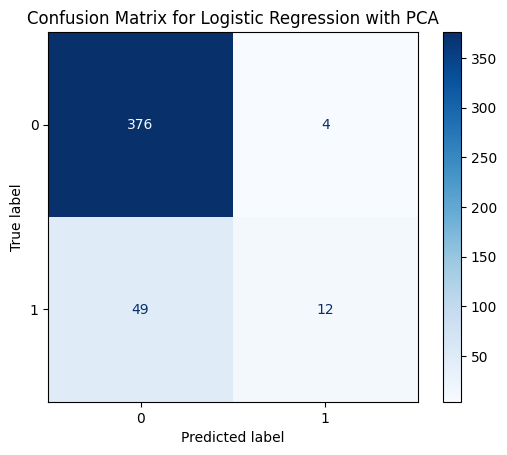

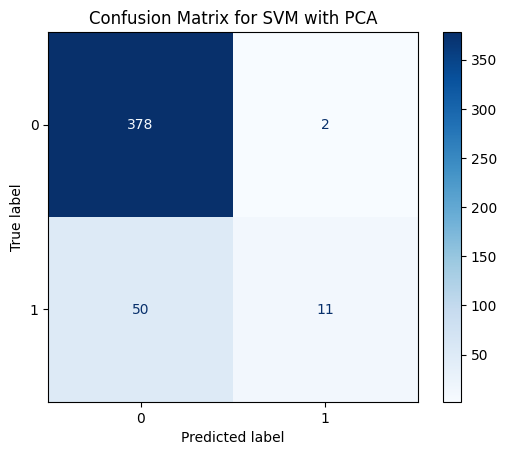

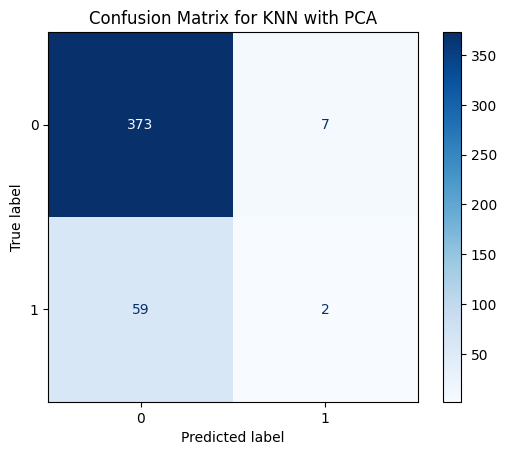

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(y_test, y_pred_log_reg_pca, 'Logistic Regression with PCA')
plot_confusion_matrix(y_test, y_pred_svm_pca, 'SVM with PCA')
plot_confusion_matrix(y_test, y_pred_knn_pca, 'KNN with PCA')



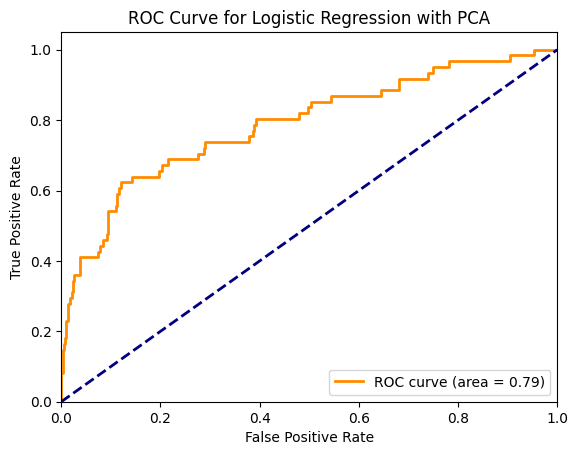

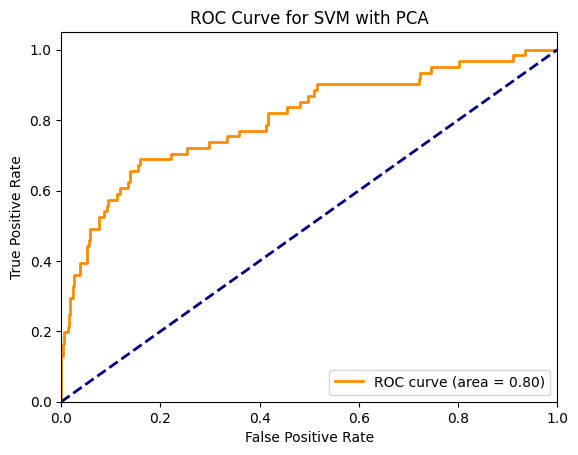

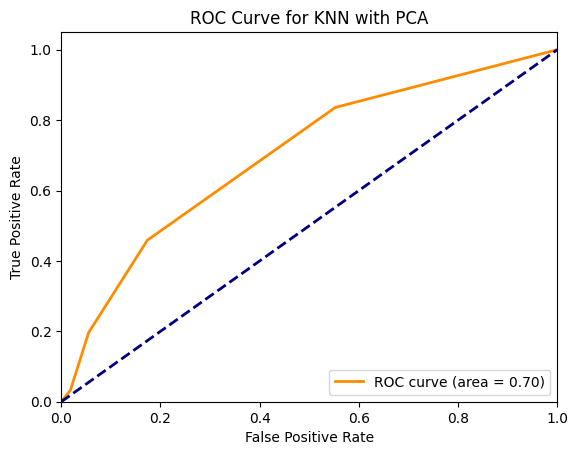

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# For Logistic Regression
y_prob_log_reg = log_reg_grid.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob_log_reg, 'Logistic Regression with PCA')

# For SVM
y_prob_svm = svm_grid.decision_function(X_test)
plot_roc_curve(y_test, y_prob_svm, 'SVM with PCA')

# For KNN
y_prob_knn = knn_grid.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob_knn, 'KNN with PCA')



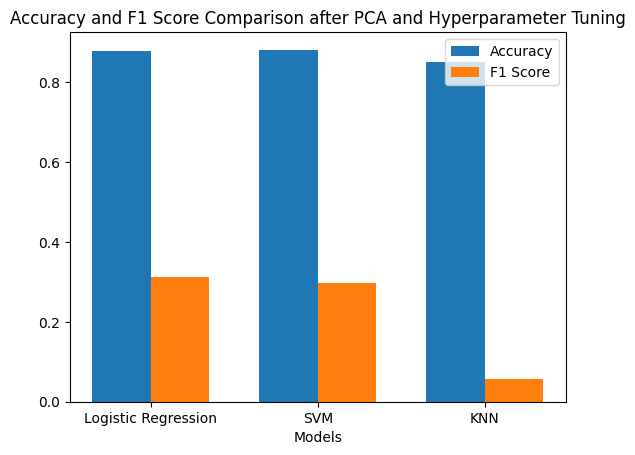

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Calculate accuracy and F1 score for each model
accuracy_scores = [
    accuracy_score(y_test, y_pred_log_reg_pca),
    accuracy_score(y_test, y_pred_svm_pca),
    accuracy_score(y_test, y_pred_knn_pca)
]

f1_scores = [
    f1_score(y_test, y_pred_log_reg_pca),
    f1_score(y_test, y_pred_svm_pca),
    f1_score(y_test, y_pred_knn_pca)
]

models = ['Logistic Regression', 'SVM', 'KNN']

# Plot accuracy and F1 score comparison
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_title('Accuracy and F1 Score Comparison after PCA and Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()



**Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the models
log_reg = LogisticRegression(max_iter=5000)
svm = SVC()
knn = KNeighborsClassifier()

# Define hyperparameters for tuning
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# Set up GridSearchCV for each model
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, verbose=1, n_jobs=-1)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, verbose=1, n_jobs=-1)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, verbose=1, n_jobs=-1)

# Fit the models
grid_log_reg.fit(X_train_processed, y_train)
grid_svm.fit(X_train_processed, y_train)
grid_knn.fit(X_train_processed, y_train)

# Get the best estimators
best_log_reg = grid_log_reg.best_estimator_
best_svm = grid_svm.best_estimator_
best_knn = grid_knn.best_estimator_

# Make predictions on the test set
y_pred_log_reg = best_log_reg.predict(X_test_processed)
y_pred_svm = best_svm.predict(X_test_processed)
y_pred_knn = best_knn.predict(X_test_processed)

# Evaluate the models
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log_reg))

print("SVM Report")
print(classification_report(y_test, y_pred_svm))

print("KNN Report")
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Logistic Regression Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       380
           1       0.61      0.38      0.46        61

    accuracy                           0.88       441
   macro avg       0.76      0.67      0.70       441
weighted avg       0.86      0.88      0.87       441

SVM Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       380
           1       0.74      0.38      0.50        61

    accuracy                           0.90       441
   macro avg       0.82      0.68      0.72       441
weighted avg       0.88      0.90      0.88       441

KNN Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.93       380
     